In [33]:
import yfinance as yf
import mplfinance as mpf
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd


In [34]:
start = datetime(2024, 1, 1)
end = datetime(2025, 1 ,1)

In [35]:
tic = 'OPEN'
data = yf.download(tic, start=start, end=end)

print(data.head(10))

C:\Users\oosode.Oos\AppData\Local\Temp\ipykernel_25628\2702957485.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tic, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price       Close   High    Low  Open    Volume
Ticker       OPEN   OPEN   OPEN  OPEN      OPEN
Date                                           
2024-01-02  4.280  4.400  4.190  4.36  20759800
2024-01-03  4.030  4.110  3.900  4.02  22437500
2024-01-04  4.020  4.110  3.940  3.98  12462900
2024-01-05  3.625  4.010  3.555  3.94  22389500
2024-01-08  3.950  3.950  3.650  3.69  17552000
2024-01-09  3.700  3.950  3.670  3.95  15103900
2024-01-10  3.680  3.800  3.595  3.74  14848400
2024-01-11  3.560  3.685  3.390  3.60  25547400
2024-01-12  3.510  3.770  3.490  3.65  16301900
2024-01-16  3.220  3.400  3.180  3.39  19705800


In [18]:
print('Original data')
print(data.info())
print('\nFirst few rows')
print(data.head())
print(data.columns.tolist())

Original data
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2024-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, OPEN)   252 non-null    float64
 1   (High, OPEN)    252 non-null    float64
 2   (Low, OPEN)     252 non-null    float64
 3   (Open, OPEN)    252 non-null    float64
 4   (Volume, OPEN)  252 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB
None

First few rows
Price       Close  High    Low  Open    Volume
Ticker       OPEN  OPEN   OPEN  OPEN      OPEN
Date                                          
2024-01-02  4.280  4.40  4.190  4.36  20759800
2024-01-03  4.030  4.11  3.900  4.02  22437500
2024-01-04  4.020  4.11  3.940  3.98  12462900
2024-01-05  3.625  4.01  3.555  3.94  22389500
2024-01-08  3.950  3.95  3.650  3.69  17552000
[('Close', 'OPEN'), ('High', 'OPEN'), ('Low', 'OPEN'), ('Open', 'OPEN'), ('Volume', 'OPEN')]


In [36]:
#checking for mssing values
print(f'\n Missing valuesin each column:')
print(data.isnull().sum())


 Missing valuesin each column:
Price   Ticker
Close   OPEN      0
High    OPEN      0
Low     OPEN      0
Open    OPEN      0
Volume  OPEN      0
dtype: int64


In [37]:
data.columns = data.columns.droplevel(1) #remove ticker lvl
print(f'\nColumns after fixing: {data.columns.tolist()}')


Columns after fixing: ['Close', 'High', 'Low', 'Open', 'Volume']


In [38]:
#clean and prepare das data
data_clean = data.dropna(subset=['Open', 'High', 'Low','Close']).copy()

In [39]:
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    data_clean[col] = pd.to_numeric(data_clean[col], errors='coerce')

In [ ]:
#drop remaining nan values
data_clean=data_clean.dropna()

In [40]:
print(f'\nFinal data shape: {data_clean.shape}')
print('\nFirst few rows of cleaned data')
print(data_clean.head())


Final data shape: (252, 5)

First few rows of cleaned data
Price       Close  High    Low  Open    Volume
Date                                          
2024-01-02  4.280  4.40  4.190  4.36  20759800
2024-01-03  4.030  4.11  3.900  4.02  22437500
2024-01-04  4.020  4.11  3.940  3.98  12462900
2024-01-05  3.625  4.01  3.555  3.94  22389500
2024-01-08  3.950  3.95  3.650  3.69  17552000


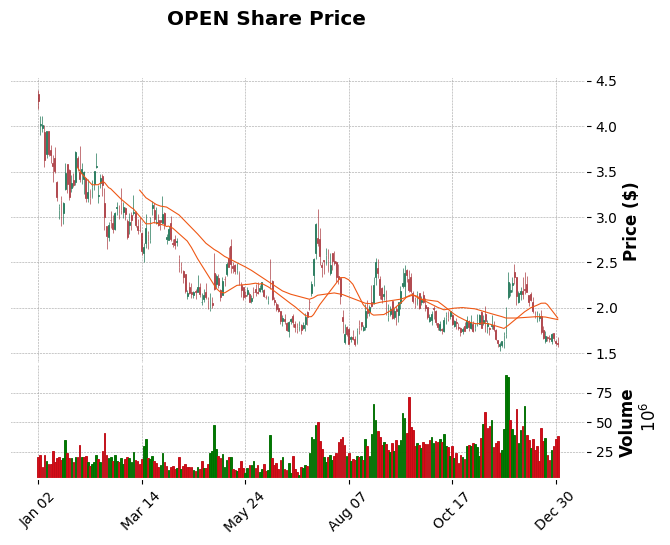

In [45]:
mpf.plot(data_clean,
         type='candle',
         volume=True,
         style='charles',
         title=f'{tic} Share Price',
         ylabel='Price ($)',
         ylabel_lower='Volume',
         mav=(20,50),
         show_nontrading=False)

In [44]:
mpf.plot(data_clean,
         type='candle',
         volume=True,
         style='charles',
         title=f'{tic} Share Price',
         ylabel='Price ($)',
         ylabel_lower='Volume',
         mav=(20,50),
         show_nontrading=False,
         savefig='high_quality_chart.png',  # Save with custom filename
         figratio=(12, 8),  # Wider figure
         figscale=1.2)      # Larger scale

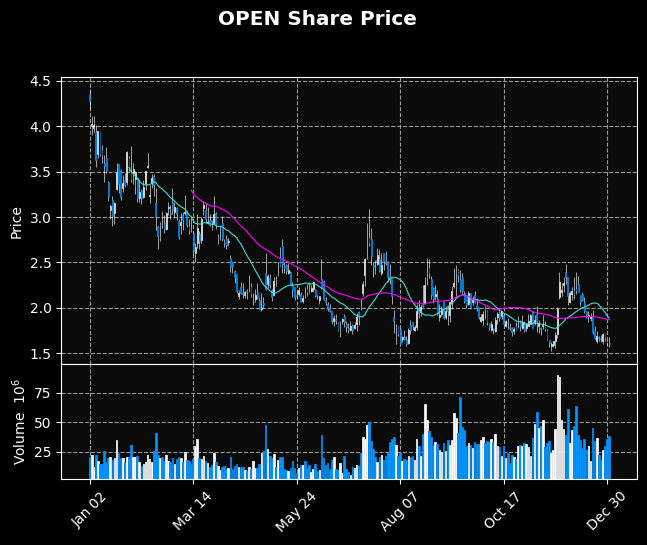

In [46]:
# Available styles: 'charles', 'mike', 'nightclouds', 'brasil', 'binance', 'yahoo'
mpf.plot(data_clean,
         type='candle',
         volume=True,
         style='nightclouds',  # Try a different style
         title=f'{tic} Share Price',
         mav=(20,50))

In [47]:
mpf.plot(data_clean,
         type='candle',
         volume=True,
         style='charles',
         title=f'{tic} with RSI',
         mav=(20,50),
         addplot=mpf.make_addplot(rsi_data, panel=2, color='purple'))  # Add RSI panel

NameError: name 'rsi_data' is not defined

C:\Users\oosode.Oos\AppData\Local\Temp\ipykernel_25628\3032170915.py:2: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  recent_data = data_clean.last('10D')  # Last 60 days


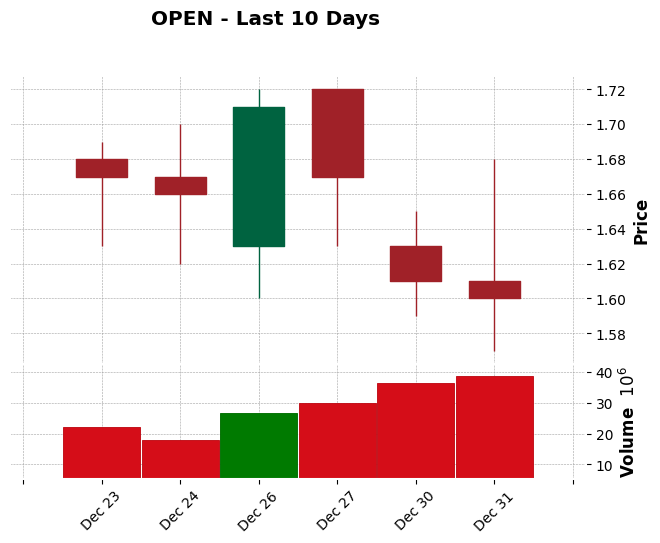

In [51]:
# Plot only recent data
recent_data = data_clean.last('10D')  # Last 60 days
mpf.plot(recent_data,
         type='candle',
         volume=True,
         style='charles',
         title=f'{tic} - Last 10 Days')